# Classification using k-Nearest Neighbors

We'll give k-NN a try using the well known [wine dataset](https://archive.ics.uci.edu/dataset/109/wine). These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [3]:
# Import the necessary libraries
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns

In [4]:
# Load the wine dataset
wine = load_wine()

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

We'll split the dataset into training and testing arrays. For today, we'll choose two features to train the model with. In this first example, we choose the first two features: alcohol and malic acid.

One data is loaded, we can easily use the `KNeighborsClassifier` function. One downside is that We need to specify how many classes. In this case we already know that there are 3 classes (i.e. 3 different cultivars), but usually we would need to take the extra step of testing with different class numbers and seeing which fit the data the best.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data[:, :2], wine.target, test_size=0.2, random_state=0)

# Create a KNN classifier with 3 nearest neighbours
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.861


We can plot out a visualisation of the classification results too:

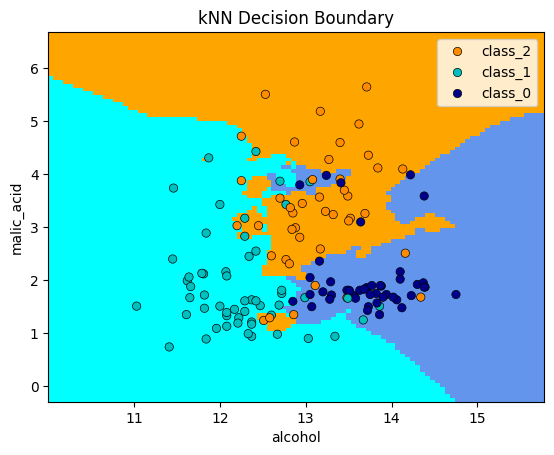

In [8]:
# Plot out decision boundary
cmap_light = ListedColormap(["cornflowerblue","cyan","orange" ])
cmap_bold = ["darkorange", "c", "darkblue"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=wine.feature_names[0],
        ylabel=wine.feature_names[1],
        shading="auto",
)
sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=wine.target_names[y_train],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
)
plt.title("kNN Decision Boundary")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data[:, 2:4], wine.target, test_size=0.2, random_state=0)

# Create a KNN classifier with 3 nearest neighbours
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.639


In [ ]:
# Plot out decision boundary
cmap_light = ListedColormap(["cornflowerblue","cyan","orange" ])
cmap_bold = ["darkorange", "c", "darkblue"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=wine.feature_names[2],
        ylabel=wine.feature_names[3],
        shading="auto",
)
sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=wine.target_names[y_train],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
)
plt.title("kNN Decision Boundary")
plt.xlabel(wine.feature_names[2])
plt.ylabel(wine.feature_names[3])
plt.show()

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data[:, [0,6]], wine.target, test_size=0.2, random_state=0)

# Create a KNN classifier with 3 nearest neighbours
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.889


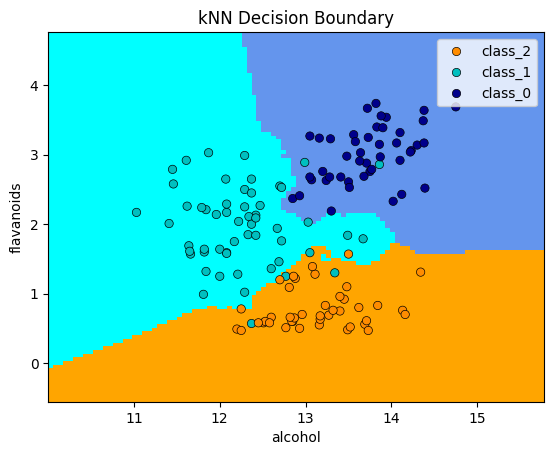

In [11]:
# Plot out decision boundary
cmap_light = ListedColormap(["cornflowerblue","cyan","orange" ])
cmap_bold = ["darkorange", "c", "darkblue"]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=wine.feature_names[0],
        ylabel=wine.feature_names[6],
        shading="auto",
)
sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=wine.target_names[y_train],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
)
plt.title("kNN Decision Boundary")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[6])
plt.show()

# Classification using Support Vector Machine

A Support Vector Machine (SVM) is a type of algorithm used for sorting things into groups or predicting values. It's really good at sorting things when they can't be separated easily by a straight line. SVM finds the best line or boundary to separate different groups or values in the data. Like Logistic Regression before, SVM traditionally is used for binary classification, but can be extended to handle multi-class classification using specific techniques.

Let's start by importing [the Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), a well-known dataset often used for ML practice. Compared to previous datasets, the Iris dataset is much smaller with only 150 rows of data)

In [12]:
# Import the libraries
from sklearn.datasets import load_iris
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
%matplotlib inline

# Load the iris dataset
iris = load_iris()

In [13]:
iris.data.shape

(150, 4)

This dataset only has four features:
*    Sepal Length
*    Sepal Width
*    Petal Length
*    Petal Width

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We'll again split the dataset into training and testing arrays, and like before, we'll choose two features to train the model with. In this first example, we choose the first two features: alcohol and malic acid.

One data is loaded, we can easily use the `SVC` function (SVC stands for C-Support Vector Classification, a specific implementation of SVM).

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=None) #just take first 2 columns of data

# Create a SVM classifier
svm_model = svm.SVC()

# Train the classifier on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.700


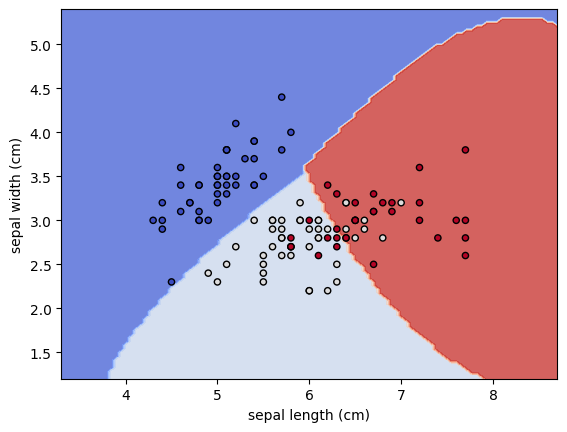

In [16]:
#Start plotting
_, ax = plt.subplots()
x0, x1 = X_train[:, 0], X_train[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
      svm_model,
      X_train,
      response_method="predict",
      cmap=plt.cm.coolwarm,
      alpha=0.8,
      ax=ax,
      xlabel=iris.feature_names[0],
      ylabel=iris.feature_names[1],
)
plt.scatter(x0, x1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.show()

What about training the model using a different pair of features?

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, 2:], iris.target, test_size=0.2, random_state=None)

# Create a SVM classifier
svm_model = svm.SVC()

# Train the classifier on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

In [ ]:
#Start plotting
_, ax = plt.subplots()
x0, x1 = X_train[:, 0], X_train[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
      svm_model,
      X_train,
      response_method="predict",
      cmap=plt.cm.coolwarm,
      alpha=0.8,
      ax=ax,
      xlabel=iris.feature_names[2],
      ylabel=iris.feature_names[3],
)
plt.scatter(x0, x1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.show()

# Decision Trees

Decision trees are a popular and intuitive machine learning algorithm used for both classification and regression tasks. They are called "trees" because they consist of a tree-like structure of nodes and branches. Each node represents a decision based on the value of a feature, and each branch represents the outcome of that decision. The decision tree algorithm determines the best feature and threshold to split the data at each node.

Decision trees have several advantages, including their simplicity, interpretability, and ability to handle both numerical and categorical data. However, they can be prone to overfitting, especially when the trees are deep or when the dataset is noisy. Techniques such as pruning, limiting the tree depth, and using ensemble methods like Random Forests can help mitigate overfitting and improve the generalization performance of decision trees.

Let's take a look at one using a subset of the [Titanic dataset](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active). The features we'll look at are:
*    Pclass: The class of the ticket that was purchased
*    Age: The age of the passenger
*    SibSp: # of siblings / spouses on the Titanic
*    Parch: # of parents / children on the Titanic
*    Fare: The fare the passenger paid

In [ ]:
import pandas as pd
data = pd.read_csv(
    'https://raw.githubusercontent.com/iamamangosteen/aimlnotebooks/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Fare'])
data = data.dropna()

data.head()

In [ ]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

y = data.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state = 100)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
import numpy as np
# Make predictions using the testing dataset
predictions = clf.predict(X_test)
print(f"Predictions: {predictions[:10]}")
print(f"     Actual: {np.array(y_test[:10])}")

In [ ]:
# Check the total accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

We've seen a lot of different parameters, so let's (finally) talk about how we can optimise them. One way is simple trial and error - you can train a bunch of models and observe the results and pick the best performing model. These options that we can customise are called **hyperparameters**, i.e. parameters that are not learned during the training process of a machine learning model but are set prior to training and control the learning process.

However, sklearn helps automate this process with the `GridSearchCV` class. You can specify the hyperparameters you want to test and it will return the best combination:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Creating a dictionary of parameters to use in GridSearchCV
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

In [ ]:
import pandas as pd
data = pd.read_csv(
    'https://raw.githubusercontent.com/iamamangosteen/aimlnotebooks/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Fare'])
data = data.dropna()

# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

y = data.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state = 100)

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=4, max_features=0.8, splitter="best")
clf = clf.fit(X_train, y_train)

import numpy as np
# Make predictions using the testing dataset
predictions = clf.predict(X_test)
print(f"Predictions: {predictions[:10]}")
print(f"     Actual: {np.array(y_test[:10])}")

# Check the total accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

## Exercise: Try out GridSearchCV

Try to implement GridSearchCV on one of our previous datasets using a classifier of your choice:
*    Fashion MNIST
*    Digits MNIST
*    Iris
*    Titanic

# Linear Regression with sklearn

Here we'll use a new dataset: the [California housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). This has over 20,000 rows of data, with 8 features.


In [ ]:
#Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load California housing dataset
cal_houses = fetch_california_housing()

In [ ]:
cal_houses.data.shape

It's important to understand your datasets. In this dataset, the rows represent **block groups**. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). This is to keep individual responses to the Census private and anonymous.

*    MedInc median income in block group
*    HouseAge median house age in block group
*    AveRooms average number of rooms per household
*    AveBedrms average number of bedrooms per household
*    Population block group population
*    AveOccup average number of household members
*    Latitude block group latitude
*    Longitude block group longitude

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

The **target** variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [ ]:
cal_houses.feature_names

In [ ]:
cal_houses.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cal_houses.data[:, np.newaxis, 0], cal_houses.target, test_size=0.2, random_state=0)

# Create a Linear Regression model
lin_reg_model = LinearRegression()

# Train the Linear Regression model
lin_reg_model.fit(X_train, y_train)

# Test Linear Regression model
y_pred = lin_reg_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"MSE: {mse:.3f}")

# Plot best fit line
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")

plt.xlabel(cal_houses.feature_names[0])
plt.ylabel("Housing Price (aka target)")


Note that this reveals some additional information about the dataset: the price is capped at \$500,000 dollars, so more expensive houses are also labeled as \$500,000 houses. Should we remove these houses and rerun our training? Possibly! This is one of many judgement calls that data scientists need to make when analysing data.

## Exercise: Calculating the MSE

Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. A model with no error would have a MSE of zero. Can you calculate the MSE for each feature? Which feature has the lowest MSE?